In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [41]:
df_train = pd.read_parquet('train.parquet', engine='pyarrow')
df_test = pd.read_parquet('test.parquet', engine='pyarrow')
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [42]:
df.shape

(243532, 23)

In [43]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243532 entries, 0 to 243531
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    243532 non-null  int64  
 1   BMI                   243532 non-null  float32
 2   PhysHlth              243532 non-null  float32
 3   Age                   243532 non-null  string 
 4   HighBP                243532 non-null  string 
 5   HighChol              243532 non-null  string 
 6   CholCheck             243532 non-null  string 
 7   Smoker                243532 non-null  string 
 8   Stroke                243532 non-null  string 
 9   HeartDiseaseorAttack  243532 non-null  string 
 10  PhysActivity          243532 non-null  string 
 11  Fruits                243532 non-null  string 
 12  Veggies               243532 non-null  string 
 13  HvyAlcoholConsump     243532 non-null  string 
 14  AnyHealthcare         243532 non-null  string 
 15  

,ID,BMI,PhysHlth,Age,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Education,Income,Diabetes_binary
count,243532.000000,243532.000000,243532.000000,243532,243532,243532,243532,243532,243532,243532,...,243532,243532,243532,243532,243532,243532,243532,243532,243532,243532
unique,NaN,NaN,NaN,13,2,2,2,2,2,2,...,2,2,2,5,31,2,2,6,8,2
top,NaN,NaN,NaN,60 to 64,0,0,1,0,0,0,...,0,1,0,Fair,0,0,0,6,8,Non-Diabetic
freq,NaN,NaN,NaN,31933,139022,140226,234447,135570,233624,220619,...,229879,231611,223037,85521,168681,202615,136288,103087,86752,209600
mean,126849.488683,28.386837,4.235706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,73242.505262,6.607493,8.712722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,12.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,63425.750000,24.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,126874.500000,27.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,190280.250000,31.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df["Education"] = df["Education"].str.replace("Advanced Degree", "High School Graduate")
df["Education"] = df["Education"].str.replace("6", "College Graduate")
df["Education"] = df["Education"].str.replace("Some Collge Degree", "Some College or Technical School")

df["Income"] = df["Income"].map({
    "1": "Less than $10,000",
    "2": " \$10,000 - \$14,999",
    "3": " \$15,000 - \$19,999",
    "4": " \$20,000 - \$24,999",
    "5": " \$25,000 - \$34,999",
    "6": " \$35,000 - \$49,999",
    "7": " \$50,000 - \$74,999",
    "8": "More than $75,000"
})

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
C:\Users\FANG\AppData\Local\Temp\ipykernel_11288\2716145638.py:7: SyntaxWarning: invalid escape sequence '\$'
  "2": " \$10,000 - \$14,999",
C:\Users\FANG\AppData\Local\Temp\ipykernel_11288\2716145638.py:8: SyntaxWarning: invalid escape sequence '\$'
  "3": " \$15,000 - \$19,999",
C:\Users\FANG\AppData\Local\Temp\ipykernel_11288\2716145638.py:9: SyntaxWarning: invalid escape sequence '\$'
  

In [45]:
# Count missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Series([], dtype: int64)


In [46]:
df["Diabetes_binary"] = df["Diabetes_binary"].map({"Non-Diabetic": 0, "Diabetic": 1})
df = df.drop(columns=["ID"], errors="ignore")
df['MentHlth'] = df['MentHlth'].astype(float)

categorical_cols = df.select_dtypes(include="string").columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Age', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education']


In [47]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

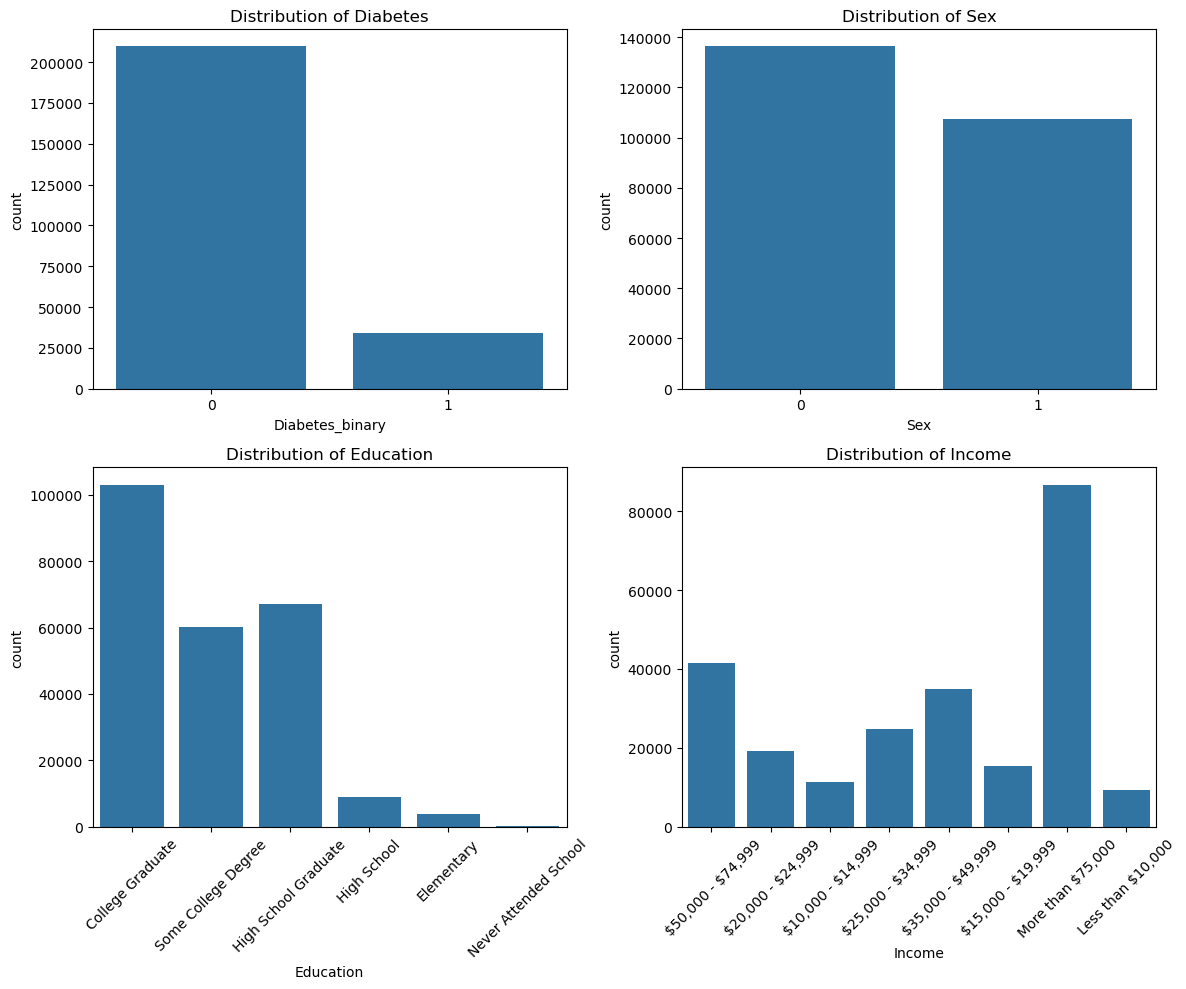

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows × 2 columns

# First plot
sns.countplot(x="Diabetes_binary", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Diabetes")

# Second plot
sns.countplot(x="Sex", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Sex")

# Third plot
sns.countplot(x="Education", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Education")
axes[1, 0].tick_params(axis='x', rotation=45)

# Fourth plot
sns.countplot(x="Income", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Income")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [49]:
X = df_encoded.drop("Diabetes_binary", axis=1)
y = df_encoded["Diabetes_binary"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [51]:
for col in X_train.select_dtypes(include='bool').columns:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

In [52]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [53]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # For ROC AUC

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[41088   833]
 [ 5736  1050]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     41921
           1       0.56      0.15      0.24      6786

    accuracy                           0.87     48707
   macro avg       0.72      0.57      0.58     48707
weighted avg       0.83      0.87      0.83     48707

ROC AUC Score: 0.8261052097677475


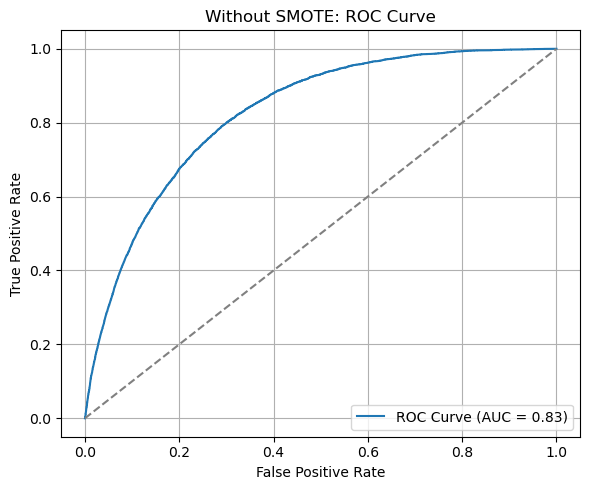

In [55]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Without SMOTE: ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [57]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set to prevent data leakage
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_balanced).value_counts())


Before SMOTE: Diabetes_binary
0    167679
1     27146
Name: count, dtype: int64
After SMOTE: Diabetes_binary
0    167679
1    167679
Name: count, dtype: int64


In [58]:
model_balanced = LogisticRegression(max_iter=100000)
model_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_balanced = model_balanced.predict(X_test)
y_prob_balanced = model_balanced.predict_proba(X_test)[:, 1]

[[36083  5838]
 [ 3866  2920]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     41921
           1       0.33      0.43      0.38      6786

    accuracy                           0.80     48707
   macro avg       0.62      0.65      0.63     48707
weighted avg       0.82      0.80      0.81     48707



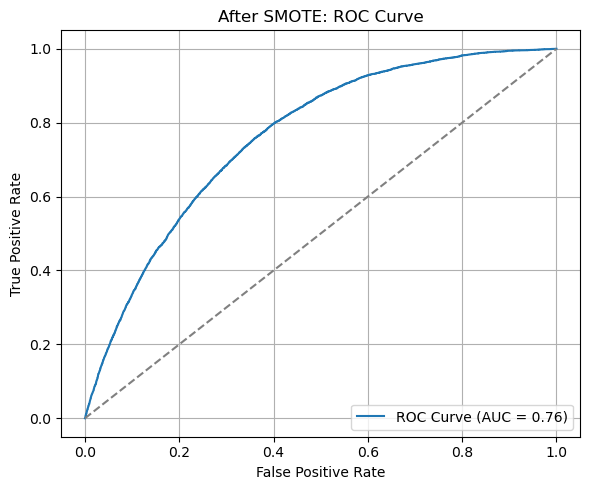

In [59]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_balanced)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("After SMOTE: ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.903     0.861     0.881     41921
           1      0.333     0.430     0.376      6786

    accuracy                          0.801     48707
   macro avg      0.618     0.646     0.629     48707
weighted avg      0.824     0.801     0.811     48707

AUC: 0.7627191175902258
=== Random Forest ===
              precision    recall  f1-score   support

           0      0.899     0.890     0.894     41921
           1      0.358     0.380     0.369      6786

    accuracy                          0.819     48707
   macro avg      0.628     0.635     0.631     48707
weighted avg      0.823     0.819     0.821     48707

AUC: 0.7784959809566437
=== MLP ===
              precision    recall  f1-score   support

           0      0.906     0.867     0.886     41921
           1      0.352     0.446     0.394      6786

    accuracy                          0.808     48707
   macro avg      

f:\Anaconda\envs\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:27:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
              precision    recall  f1-score   support

           0      0.904     0.860     0.882     41921
           1      0.337     0.438     0.381      6786

    accuracy                          0.802     48707
   macro avg      0.621     0.649     0.631     48707
weighted avg      0.825     0.802     0.812     48707

AUC: 0.7750770341162039
=== Gradient Boosting ===
              precision    recall  f1-score   support

           0      0.933     0.785     0.853     41921
           1      0.330     0.654     0.438      6786

    accuracy                          0.767     48707
   macro avg      0.632     0.719     0.646     48707
weighted avg      0.849     0.767     0.795     48707

AUC: 0.8050053718784888


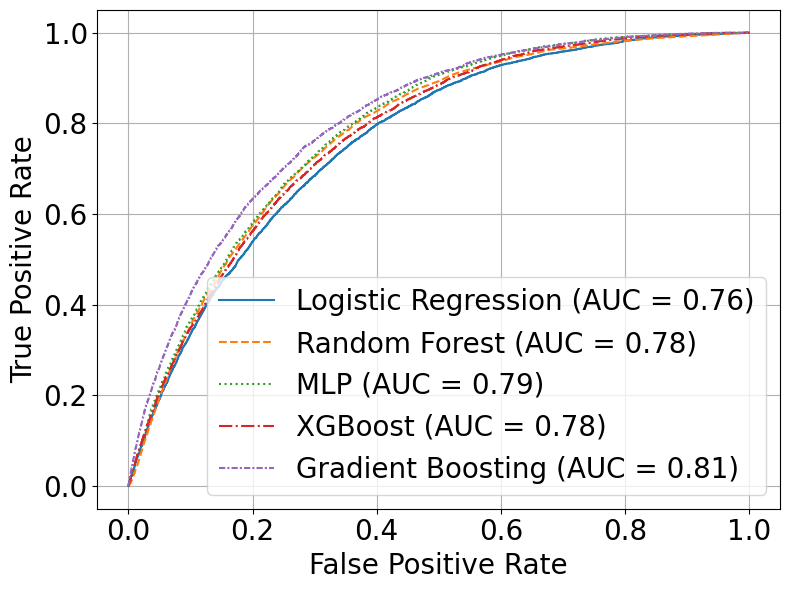

In [62]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

linestyles = {
    "Logistic Regression": "solid",         # or '-'
    "Random Forest": "dashed",              # or '--'
    "MLP": "dotted",                        # or ':'
    "XGBoost": "dashdot",                   # or '-.'
    "Gradient Boosting": (0, (3, 1, 1, 1))  # custom dash pattern
}

# Store results
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print("AUC:", roc_auc_score(y_test, y_prob))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})", linestyle=linestyles[name])

# Plot ROC Curve
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)

# Set tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set legend with larger font size
plt.legend(fontsize=20)

plt.grid(True)
plt.tight_layout()
plt.show()


=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.877     0.980     0.926     41921
           1      0.558     0.155     0.242      6786

    accuracy                          0.865     48707
   macro avg      0.718     0.567     0.584     48707
weighted avg      0.833     0.865     0.831     48707

AUC: 0.8261052097677475
=== Random Forest ===
              precision    recall  f1-score   support

           0      0.877     0.973     0.923     41921
           1      0.487     0.160     0.241      6786

    accuracy                          0.860     48707
   macro avg      0.682     0.567     0.582     48707
weighted avg      0.823     0.860     0.828     48707

AUC: 0.7974644942338279
=== MLP ===
              precision    recall  f1-score   support

           0      0.881     0.974     0.926     41921
           1      0.547     0.191     0.283      6786

    accuracy                          0.865     48707
   macro avg      

f:\Anaconda\envs\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:30:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
              precision    recall  f1-score   support

           0      0.880     0.977     0.926     41921
           1      0.556     0.177     0.269      6786

    accuracy                          0.866     48707
   macro avg      0.718     0.577     0.597     48707
weighted avg      0.835     0.866     0.834     48707

AUC: 0.8270430097514128
=== Gradient Boosting ===
              precision    recall  f1-score   support

           0      0.878     0.981     0.927     41921
           1      0.576     0.161     0.251      6786

    accuracy                          0.867     48707
   macro avg      0.727     0.571     0.589     48707
weighted avg      0.836     0.867     0.833     48707

AUC: 0.828031880844067


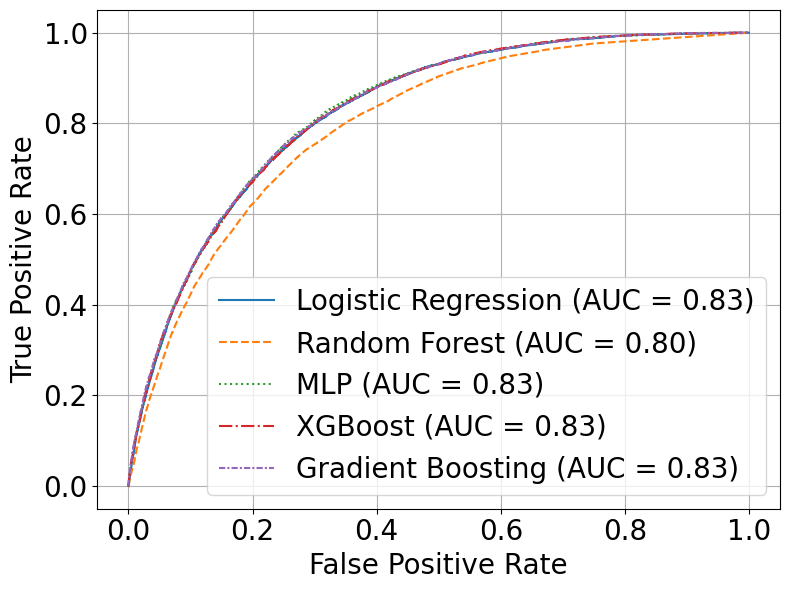

In [63]:
# Store results
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print("AUC:", roc_auc_score(y_test, y_prob))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})", linestyle=linestyles[name])

plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)

# Set tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set legend with larger font size
plt.legend(fontsize=20)

plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
import numpy as np

def get_top_features(model, X_train, model_name="model", top_n=5):
    feature_names = X_train.columns
    
    # Logistic Regression
    if hasattr(model, "coef_"):
        # importance = np.abs(model.coef_[0])
        importance = model.coef_[0]
    # Tree-based models (RF, XGB, GBT)
    elif hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    else:
        raise ValueError(f"Feature importance not available for {model_name}")

    # Create DataFrame and get top N
    feat_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)

    print(f"\nTop {top_n} features for {model_name}:\n")
    print(feat_df.head(top_n).to_string(index=False))
    return feat_df.head(top_n)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    get_top_features(model, X_train_balanced, model_name=name, top_n=5)

f:\Anaconda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Top 5 features for Logistic Regression:

    Feature  Importance
CholCheck_1    1.212550
   HighBP_1    0.636191
 HighChol_1    0.419526
        BMI    0.065702
   PhysHlth   -0.017514

Top 5 features for Random Forest:

     Feature  Importance
         BMI    0.158636
    PhysHlth    0.059691
GenHlth_Poor    0.057126
    HighBP_1    0.052388
GenHlth_Fair    0.047882


f:\Anaconda\envs\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:25:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 5 features for XGBoost:

     Feature  Importance
GenHlth_Poor    0.085763
    HighBP_1    0.064341
GenHlth_Fair    0.057349
Age_25 to 29    0.056178
Age_35 to 39    0.050337

Top 5 features for Gradient Boosting:

     Feature  Importance
    HighBP_1    0.198363
GenHlth_Fair    0.136679
GenHlth_Poor    0.121422
         BMI    0.101288
GenHlth_Good    0.034561


In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    get_top_features(model, X_train, model_name=name, top_n=5)


Top 5 features for Logistic Regression:

     Feature  Importance
GenHlth_Poor    2.037254
Age_70 to 74    1.703851
Age_65 to 69    1.668812
Age_75 to 79    1.632838
Age_60 to 64    1.514765

Top 5 features for Random Forest:

 Feature  Importance
     BMI    0.183624
PhysHlth    0.078750
HighBP_1    0.041893
Smoker_1    0.035669
Fruits_1    0.035213


f:\Anaconda\envs\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:50:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 5 features for XGBoost:

     Feature  Importance
    HighBP_1    0.245220
GenHlth_Poor    0.080492
GenHlth_Fair    0.066618
  DiffWalk_1    0.055981
 CholCheck_1    0.040245

Top 5 features for Gradient Boosting:

     Feature  Importance
    HighBP_1    0.330565
         BMI    0.175812
  HighChol_1    0.093789
  DiffWalk_1    0.082959
GenHlth_Fair    0.056420


In [60]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X_train_balanced)  # Add intercept
logit_model = sm.Logit(y_train_balanced, X_with_const)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.350951
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               335358
Model:                          Logit   Df Residuals:                   335312
Method:                           MLE   Df Model:                           45
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.4937
Time:                        21:06:22   Log-Likelihood:            -1.1769e+05
converged:                       True   LL-Null:                   -2.3245e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               4.5387      0.066     68.642  

In [61]:
X_with_const = sm.add_constant(X_train)  # Add intercept
logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.317201
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               194825
Model:                          Logit   Df Residuals:                   194779
Method:                           MLE   Df Model:                           45
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.2144
Time:                        21:06:28   Log-Likelihood:                -61799.
converged:                       True   LL-Null:                       -78662.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -6.2780      0.165    -37.953  